Epoch: 1000 cost= 0.004358362 W= -1.19623 W2 = -0.106695 b= 1.14579
Epoch: 2000 cost= 0.002695609 W= -0.926865 W2 = -0.177278 b= 1.17145
Epoch: 3000 cost= 0.002420785 W= -0.813729 W2 = -0.180728 b= 1.15896
Optimization Finished!
Training cost= 0.00242078 W= -0.813729 W2 = -0.180728 b= 1.15896 



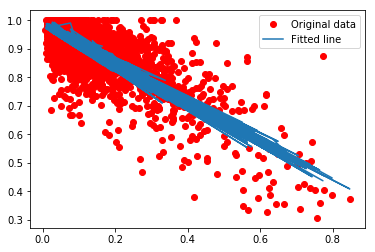

Root Mean Square Error = 0.0723361
Absolute mean square loss difference: 0.0699153


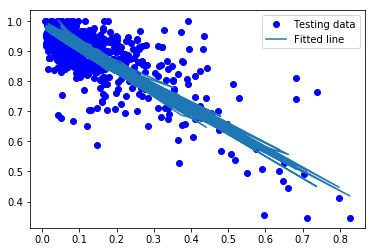

In [1]:
# A linear regression learning algorithm example using TensorFlow library.

from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random

rng = np.random

# Parameters
learning_rate = 0.05 
training_epochs = 3000 #number of iterations
display_step = 1000

#read csv file
datapath = "/Users/tuanle/DynamicPricing/Data/"
Ha_Noi = pd.read_csv(datapath+"HaNoi_3month_LWT.csv")
#Add an additional column into the table
# sLength = len(Ha_Noi['accept_rate'])
Ha_Noi['accept_rate_timeT'] = pd.Series(Ha_Noi['accept_rate'], index=Ha_Noi.index)
#Shift the entries in the accept_rate column upward
Ha_Noi.accept_rate = Ha_Noi.accept_rate.shift(-1)
#Drop all the "na" entries in the original table
Ha_Noi = Ha_Noi.dropna(subset = ["longwait_percent4"])
Ha_Noi = Ha_Noi.dropna(subset=["accept_rate"])
Ha_Noi = Ha_Noi.dropna(subset = ["longwait_percent2"])
df2 = pd.DataFrame(Ha_Noi)

#split the dataset into training and testing sets
train_set, test_set = train_test_split(Ha_Noi, test_size=0.2, random_state = random.randint(20, 200))
# Training Data
train_X = np.asarray(train_set['longwait_percent2'])
train_X2 = np.asarray(train_set['accept_rate_timeT'])
train_Y = np.asarray(train_set['accept_rate'])
n_samples = train_X.shape[0]

#Testing Data
Xtest = np.asarray(test_set['longwait_percent2'])
Xtest2 = np.asarray(test_set['accept_rate_timeT'])
Ytest = np.asarray(test_set['accept_rate'])

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")
X2 = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
W2 = tf.Variable(random.random(), name="AcceptRateT")

# Construct a linear model
pred = tf.add(tf.add(tf.multiply(X, W), tf.multiply(X2, W2)), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent method. Note, minimize() knows to modify W and b because Variable objects are "trained" (trainable=True by default)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.contrib.learn.LinearRegressor()

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x1, x2, y) in zip(train_X, train_X2, train_Y):
            sess.run(optimizer, feed_dict={X: x1, X2: x2, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0: # checkpoint every 1000 epochs
            c = sess.run(cost, feed_dict={X: train_X, X2: train_X2, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "W2 =", sess.run(W2), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, X2: train_X2, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "W2 =", sess.run(W2), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b) + sess.run(W2)*train_X2, label='Fitted line')
    plt.legend()
    plt.show()

#     # Testing example, as requested (Issue #2)
#     test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
#     test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    testing_cost = sess.run(
        tf.sqrt(tf.reduce_sum(tf.pow(pred - Y, 2)) / (Xtest.shape[0])),
        feed_dict={X: Xtest, X2: Xtest2, Y: Ytest})  # square root of function cost above
    print("Root Mean Square Error =", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(Xtest, Ytest, 'bo', label='Testing data')
    plt.plot(Xtest, sess.run(W) * Xtest + sess.run(b) + sess.run(W2)*Xtest2, label='Fitted line')
    plt.legend()
    plt.show()
